# Test tflite model

In [1]:
#import tflite_runtime.interpreter as tflite
import numpy as np
from skimage.io import imread
#import platform
import matplotlib.pyplot as plt
import tensorflow as tf

modelpath = 'model.tflite'
imagepath = 'horse.jpg'

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(physical_devices[3], 'GPU')

In [3]:
def preprocess(data):
    data = np.expand_dims(data, axis=0)
    data_float = data.astype(np.float32)
    data_norm = data_float/127.5-1
    return data_norm

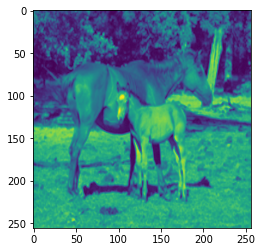

Float
Model expected input shape: [  1 256 256   3]
Input Tensor shape: (1, 256, 256, 3)


In [4]:
interpreter = tf.lite.Interpreter(model_path=modelpath)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Open image.
img = imread(imagepath)
img_arr = np.asarray(img)
prepro_img = preprocess(img_arr)
plt.imshow(prepro_img[0,:,:,1])
plt.show()

# check the type of the input tensor
if input_details[0]['dtype'] == np.float32:
    print('Float')
print('Model expected input shape: {}'.format(input_details[0]['shape']))
print('Input Tensor shape: {}'.format(prepro_img.shape))

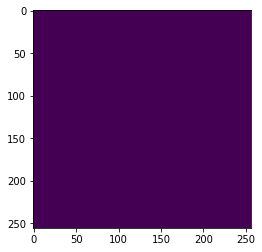

In [5]:
interpreter.set_tensor(input_details[0]['index'], prepro_img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
vis_output =(output_data[0,:,:,0]*0.5+0.5)*255
vis_output = vis_output.astype(np.uint8)
plt.imshow(vis_output)
plt.show()

In [6]:
output_data

array([[[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        ...,

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
        